In [1]:
import numpy as np
import xarray as xr
import pylab as plt

In [2]:
import dask.array as da

In [3]:
from dask.distributed import Client, LocalCluster

lc = LocalCluster(n_workers=10, threads_per_worker = 1)
client = Client(lc)
client

Client Scheduler: tcp://127.0.0.1:45395 Dashboard: http://127.0.0.1:8787/status,Cluster Workers: 10 Cores: 10 Memory: 1.08 TB


## Numpy

In [4]:
random_values = np.random.normal(size=int(2e8))
random_values.shape

array([ 0.68439868, -1.14491314, -0.01362176, ..., -1.02815198,
        0.98583654, -1.0497677 ])

In [5]:
%time hist1, bins1 = np.histogram(random_values, bins=100, range=[-5, 5]) 

CPU times: user 2.24 s, sys: 773 ms, total: 3.02 s
Wall time: 2.87 s


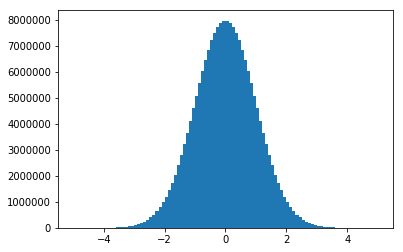

In [6]:
x = 0.5 * (bins1[1:] + bins1[:-1])
width1 = np.diff(bins1)
plt.bar(x, hist1, width1);

## Dask

In [7]:
random_values = da.random.normal(size=(2e8,), chunks=(1e6,))
random_values

,Array,Chunk
Bytes,1.60 GB,8.00 MB
Shape,"(200000000,)","(1000000,)"
Count,200 Tasks,200 Chunks
Type,float64,numpy.ndarray


In [8]:
%time hist, bins = da.histogram(random_values, bins=100, range=[-5, 5])

CPU times: user 3.06 ms, sys: 62 µs, total: 3.13 ms
Wall time: 3.07 ms


In [9]:
hist

dask.array<sum-aggregate, shape=(100,), dtype=int64, chunksize=(100,)>

CPU times: user 1.07 s, sys: 137 ms, total: 1.21 s
Wall time: 3.01 s


<BarContainer object of 100 artists>

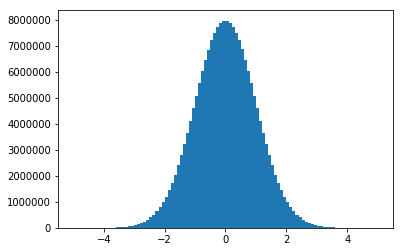

In [10]:
x = 0.5 * (bins[1:] + bins[:-1])
width = np.diff(bins)
time plt.bar(x, hist, width);

In [11]:
client.close()